In [1]:
%matplotlib inline
from pylab import *
from classy import *

Version  1.0.6
Version:  0.0.37


In [2]:
images=image.load_images('data/digits')

[9]: 180 files found
[0]: 178 files found
[7]: 179 files found
[6]: 181 files found
[1]: 182 files found
[8]: 174 files found
[4]: 181 files found
[3]: 183 files found
[2]: 177 files found
[5]: 182 files found


In [3]:
summary(images)

Images
1797 images of shape (8, 8)
Target values given.
Target names: '9', '0', '7', '6', '1', '8', '4', '3', '2', '5'
[9]: 180 files
[0]: 178 files
[7]: 179 files
[6]: 181 files
[1]: 182 files
[8]: 174 files
[4]: 181 files
[3]: 183 files
[2]: 177 files
[5]: 182 files


In [4]:
data=image.images_to_vectors(images)
data.vectors-=data.vectors.mean()
data.vectors/=data.vectors.std()

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '9', '0', '7', '6', '1', '8', '4', '3', '2', '5'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.10378408e+01 1.19312187e+02 1.

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


Text(0.5, 1.0, 'The number 4')

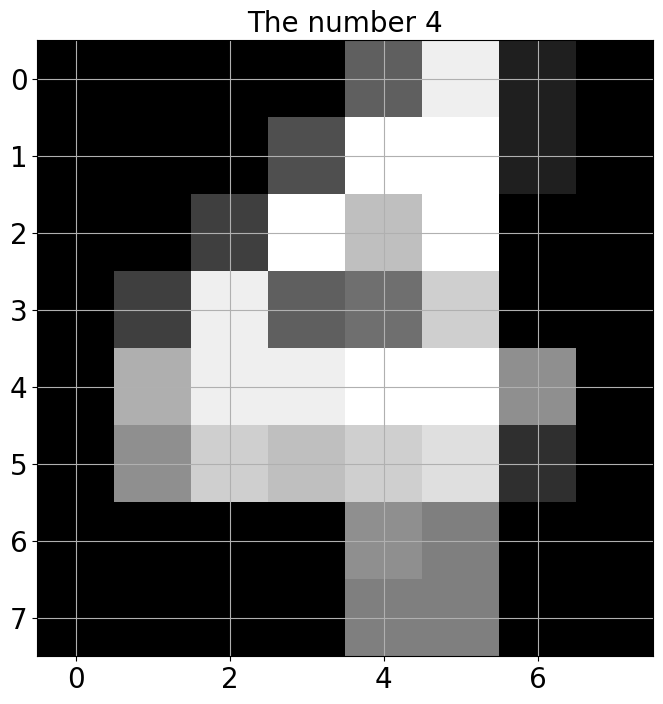

In [5]:
data_train,data_test=split(data)
n=800
image.vector_to_image(data_train.vectors[n,:],(8,8))
title("The number %s" % str(data_train.target_names[data_train.targets[n]]))

In [6]:
data_train.vectors.shape

(1347, 64)

In [7]:
num_samples,num_features=data_train.vectors.shape
num_classes=len(data_train.target_names)

## Perceptron

In [8]:
C=NumPyNetBackProp({
    'input':num_features,               # number of features
    'output':(num_classes,'linear'),  # number of classes
    'cost':'mse',
})

In [9]:
C.fit(data_train.vectors,data_train.targets)

layer       filters  size              input                output
   0 input                  1347 x   1 x   1 x  64   ->  1347 x   1 x   1 x  64
   1 connected              1347 x   1 x   1 x  64   ->  1347 x  10
   2 cost                   1347 x   1 x   1 x  10   ->  1347 x   1 x   1 x  10


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 386.57it/s]


In [10]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 94.50631031922792)
('On Test Set:', 91.77777777777779)


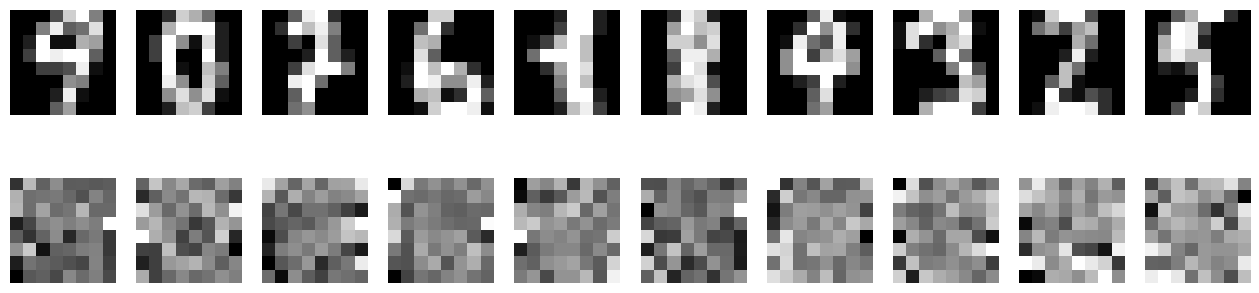

In [11]:
figure(figsize=(16,4))
for i,t in enumerate(data_train.target_names):
    subplot(2,10,i+1)
    vector=random_vector(data_train,t)
    image.vector_to_image(vector,(8,8))
    axis('off')
    
    subplot(2,10,i+11)
    image.vector_to_image(C.weights[0][:,i],(8,8))
    axis('off')
    

## Backprop

In [12]:
C=NumPyNetBackProp({
    'input':num_features,               # number of features
    'hidden':[(12,'logistic'),],
    'output':(num_classes,'logistic'),  # number of classes
    'cost':'mse',
})

In [13]:
C.fit(data_train.vectors,data_train.targets,epochs=5000)

layer       filters  size              input                output
   0 input                  1347 x   1 x   1 x  64   ->  1347 x   1 x   1 x  64
   1 connected              1347 x   1 x   1 x  64   ->  1347 x  12
   2 connected              1347 x   1 x   1 x  12   ->  1347 x  10
   3 cost                   1347 x   1 x   1 x  10   ->  1347 x   1 x   1 x  10


100%|██████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 245.43it/s]


In [14]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 99.4060876020787)
('On Test Set:', 94.88888888888889)


In [15]:
weights_ih=C.weights[0]
weights_hy=C.weights[-1]

In [16]:
weights_ih.shape

(64, 12)

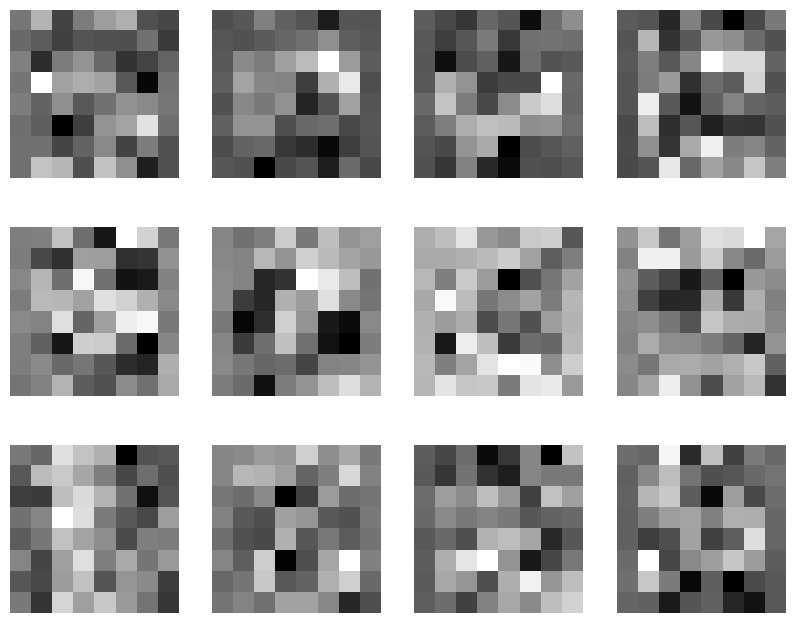

In [17]:
for i in range(weights_ih.shape[1]):
    subplot(3,4,i+1)
    image.vector_to_image(weights_ih[:,i],(8,8))
    axis('off')

## Convolutional Neural Net

In [18]:
images=image.load_images('data/digits')
num_classes=len(images.target_names)
images.data=[_/255.0 for _ in images.data]


C=NumPyNetImageNN(
    Convolutional_layer(size=3, filters=32, stride=1, pad=True, activation='Relu'),
    BatchNorm_layer(),
    Maxpool_layer(size=2, stride=1, padding=True),
    Connected_layer(outputs=100, activation='Relu'),
    BatchNorm_layer(),
    Connected_layer(outputs=num_classes, activation='Linear'),
    Softmax_layer(spatial=True, groups=1, temperature=1.),
    )

[9]: 180 files found
[0]: 178 files found
[7]: 179 files found
[6]: 181 files found
[1]: 182 files found
[8]: 174 files found
[4]: 181 files found
[3]: 183 files found
[2]: 177 files found
[5]: 182 files found


In [19]:
images_train,images_test=image.split(images,verbose=False)
summary(images_train)
summary(images_test)

Images
1432 images of shape (8, 8)
Target values given.
Target names: '9', '0', '7', '6', '1', '8', '4', '3', '2', '5'
[9]: 143 files
[0]: 142 files
[7]: 143 files
[6]: 144 files
[1]: 145 files
[8]: 139 files
[4]: 144 files
[3]: 146 files
[2]: 141 files
[5]: 145 files
Images
365 images of shape (8, 8)
Target values given.
Target names: '9', '0', '7', '6', '1', '8', '4', '3', '2', '5'
[9]: 37 files
[0]: 36 files
[7]: 36 files
[6]: 37 files
[1]: 37 files
[8]: 35 files
[4]: 37 files
[3]: 37 files
[2]: 36 files
[5]: 37 files


In [20]:
C.fit(images_train,epochs=10,batch=128)

layer       filters  size              input                output
   0 input                   128 x   8 x   8 x   3   ->   128 x   8 x   8 x   3
   1 conv     32 3 x 3 / 1   128 x   8 x   8 x   3   ->   128 x   8 x   8 x  32  0.000 BFLOPs
   2 batchnorm                       8 x   8 x  32 image
   3 max         2 x 2 / 1   128 x   8 x   8 x  32   ->   128 x   7 x   7 x  32
   4 connected               128 x   7 x   7 x  32   ->   128 x 100
   5 batchnorm                       1 x   1 x 100 image
   6 connected               128 x   1 x   1 x 100   ->   128 x  10
   7 softmax x entropy                                    128 x   1 x   1 x  10
unequal batch sizes...adjusting.


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.92s/it]


In [21]:
print("On Training Set:",C.percent_correct(images_train))
print("On Test Set:",C.percent_correct(images_test))

On Training Set: 99.86033519553072
On Test Set: 99.72602739726028
